In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [216]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [217]:
import pandas as pd 

In [4]:
X_dataframe = pd.DataFrame(X_train[0])
X_dataframe.style #view image as a matrix 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


In [218]:
print(np.bincount(y_train)) #number of observations in each category
print(min(y_train), max(y_train)) #min and max values used to index categories

[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
0 9


In [219]:
pos = []

for k in range(0, 10):
    pos.append(np.where(y_train == k)[0][0])

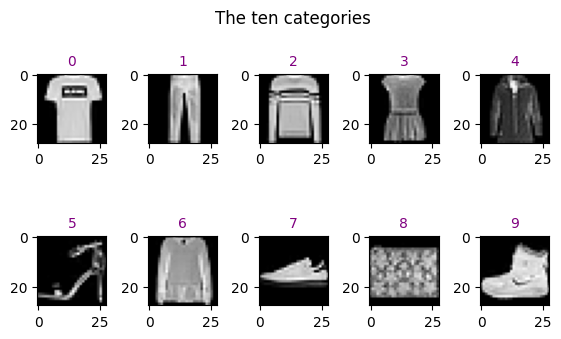

In [220]:
#visualization of the ten categories
figure = plt.figure()
figure.tight_layout(pad = 1)
figure.suptitle("The ten categories", y=0.75)

ax1 = plt.subplot(2,5,1)
plt.title(y_train[pos[0]], color = "purple", size = 10)
plt.imshow(X_train[pos[0]]/255, cmap = 'gray')

ax2 = plt.subplot(2,5,2, sharey=ax1)

plt.tick_params('y', labelbottom=False)
plt.title(y_train[pos[1]], color = "purple", size = 10)
plt.imshow(X_train[pos[1]]/255, cmap = 'gray')

ax3 = plt.subplot(2,5,3)
plt.title(y_train[pos[2]], color = "purple", size = 10)
plt.imshow(X_train[pos[2]]/255, cmap = 'gray')

ax4 = plt.subplot(2,5,4)
plt.title(y_train[pos[3]], color = "purple", size = 10)
plt.imshow(X_train[pos[3]]/255, cmap = 'gray')

ax5 = plt.subplot(2,5,5)
plt.title(y_train[pos[4]], color = "purple", size = 10)
plt.imshow(X_train[pos[4]], cmap = 'gray')

ax6 = plt.subplot(2,5,6)
plt.title(y_train[pos[5]], color = "purple", size = 10)
plt.imshow(X_train[pos[5]]/255, cmap='gray')

ax7 = plt.subplot(2,5,7)
plt.title(y_train[pos[6]], color="purple", size =10)
plt.imshow(X_train[pos[6]]/255, cmap='gray')

ax8 = plt.subplot(2,5,8)
plt.title(y_train[pos[7]], color="purple", size =10)
plt.imshow(X_train[pos[7]]/255, cmap='gray')

ax9 = plt.subplot(2,5,9)
plt.title(y_train[pos[8]], color="purple", size =10)
plt.imshow(X_train[pos[8]]/255, cmap='gray')

ax10 = plt.subplot(2,5,10)
plt.title(y_train[pos[9]], color="purple", size =10)
plt.imshow(X_train[pos[9]]/255,cmap='gray')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.65,
                    wspace=0.6,
                    hspace=0.6)
plt.show()


In [256]:
#matrices vectorization
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape: ", X_train.shape)
print("testing matrix shape", X_test.shape)

Training matrix shape:  (60000, 784)
testing matrix shape (10000, 784)


In [257]:
classes = 10

Y_train = np_utils.to_categorical(y_train, classes)
Y_test = np_utils.to_categorical(y_test, classes)

In [224]:
model = Sequential() #first try with multi-layer perceptron

In [225]:
model.add(Dense(588, input_shape=(784,)))

In [226]:
model.add(Activation('relu'))

In [227]:
model.add(Dropout(0.2))

In [228]:
model.add(Dense(400, input_shape=(588,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [165]:
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 588)               461580    
                                                                 
 activation_9 (Activation)   (None, 588)               0         
                                                                 
 dropout_6 (Dropout)         (None, 588)               0         
                                                                 
 dense_10 (Dense)            (None, 400)               235600    
                                                                 
 activation_10 (Activation)  (None, 400)               0         
                                                                 
 dropout_7 (Dropout)         (None, 400)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

In [166]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [169]:
model.fit(X_train, Y_train, 
batch_size = 128, epochs = 30,
verbose = 1
)

Epoch 1/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2546 - accuracy: 0.9047
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2456 - accuracy: 0.9067
Epoch 3/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2397 - accuracy: 0.9090
Epoch 4/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2365 - accuracy: 0.9105
Epoch 5/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2313 - accuracy: 0.9115
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2273 - accuracy: 0.9134
Epoch 7/30
469/469 [==============================] - 4s 10ms/step - loss: 0.2209 - accuracy: 0.9152
Epoch 8/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2153 - accuracy: 0.9176
Epoch 9/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2138 - accuracy: 0.9178
Epoch 10/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2027 - accuracy: 0.922

In [ ]:
score = model.evaluate(X_test, Y_test)

In [178]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.34968045353889465
Test accuracy: 0.8982999920845032


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import ZeroPadding2D

In [10]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [11]:
X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [12]:
# one-hot format classes

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [72]:
model = Sequential()                                 

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), padding = 'same', input_shape=(28,28,1))) # 32 different 3x3 kernels -> 32 feature maps
model.add(BatchNormalization(axis=-1))               
convLayer01 = Activation('relu')                     
model.add(convLayer01)


# Convolution Layer 2
model.add(Conv2D(32, (3, 3), strides=(2,2), padding = 'same')) #add strides to make kernel move by 2 steps and padding to consider also parts of image near to margin                  
model.add(BatchNormalization(axis=-1))               
model.add(Activation('relu'))                                

# Convolution Layer 3
model.add(Conv2D(32,(5, 5), padding = 'same'))       
model.add(BatchNormalization(axis=-1))               
convLayer03 = Activation('relu')                     
model.add(convLayer03)
model.add(Flatten())                                 

# Fully Connected Layer 5
model.add(Dense(512))                                
model.add(BatchNormalization())                      
model.add(Activation('relu'))                        

# Fully Connected Layer 6                       
model.add(Dropout(0.3)) # 30% dropout of randomly selected nodes (helps to avoid overfitting)
model.add(Dense(10))                                 
model.add(Activation('softmax'))     

In [62]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_28 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 activation_35 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 batch_normalization_29 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 activation_36 (Activation)  (None, 14, 14, 32)       

In [73]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
gen = ImageDataGenerator(width_shift_range=0.08, horizontal_flip=True,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [75]:
train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [76]:
model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=25, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

Epoch 1/25


C:\Users\Andrea\AppData\Local\Temp\ipykernel_7084\1620836026.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=25, verbose=1,


468/468 [==============================] - 54s 113ms/step - loss: 0.5246 - accuracy: 0.8070 - val_loss: 0.8091 - val_accuracy: 0.6604
Epoch 2/25
468/468 [==============================] - 54s 116ms/step - loss: 0.3685 - accuracy: 0.8635 - val_loss: 0.3905 - val_accuracy: 0.8570
Epoch 3/25
468/468 [==============================] - 56s 119ms/step - loss: 0.3265 - accuracy: 0.8787 - val_loss: 0.3225 - val_accuracy: 0.8777
Epoch 4/25
468/468 [==============================] - 57s 123ms/step - loss: 0.3008 - accuracy: 0.8880 - val_loss: 0.2906 - val_accuracy: 0.8924
Epoch 5/25
468/468 [==============================] - 58s 123ms/step - loss: 0.2806 - accuracy: 0.8946 - val_loss: 0.2701 - val_accuracy: 0.8994
Epoch 6/25
468/468 [==============================] - 58s 123ms/step - loss: 0.2683 - accuracy: 0.9011 - val_loss: 0.2587 - val_accuracy: 0.9055
Epoch 7/25
468/468 [==============================] - 59s 125ms/step - loss: 0.2601 - accuracy: 0.9029 - val_loss: 0.2338 - val_accuracy: 0.9

In [77]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.1905 - accuracy: 0.9348
Test score: 0.1905113309621811
Test accuracy: 0.9348000288009644


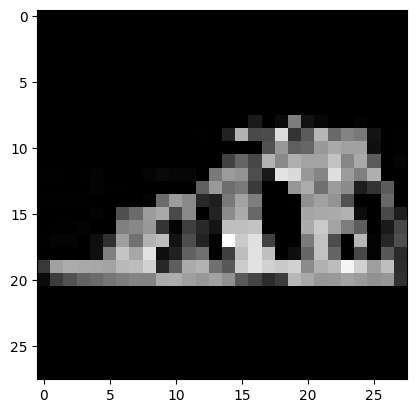

In [26]:
plt.figure()
plt.imshow(X_test[11].reshape(28,28), cmap='gray', interpolation='none')

In [27]:
layer = model.layers
filters, biases = model.layers[0].get_weights()

print(layer[1].name, filters.shape)

batch_normalization_4 (3, 3, 1, 32)


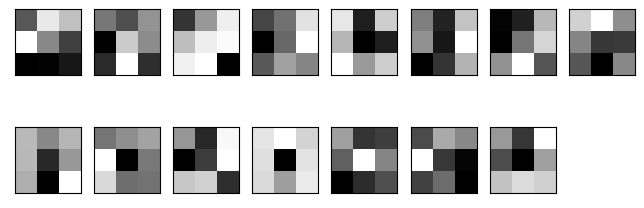

In [32]:
#Visualize kernels applied to images
fig1=plt.figure(figsize=(8, 12))
for i in range(1, 16):
    f = filters[:, :, :, i]
    fig1 =plt.subplot(8, 8, i)
    fig1.set_xticks([])  
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') 

plt.show()   


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
Total params: 9,696
Trainable params: 9,632
Non-trainable params: 64
________________________________________________________

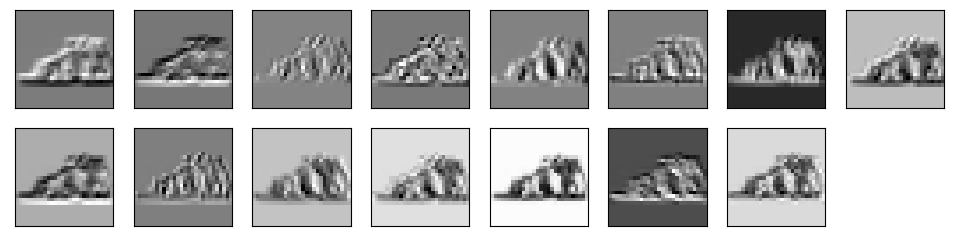

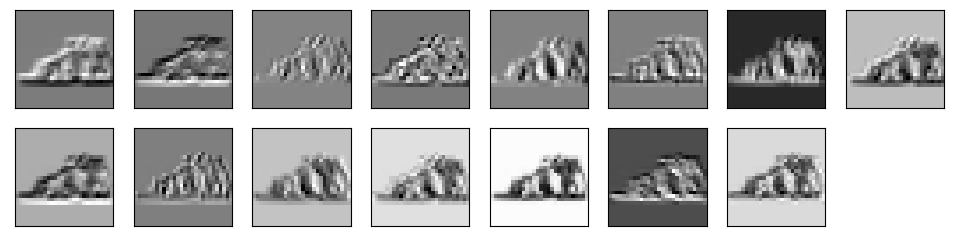

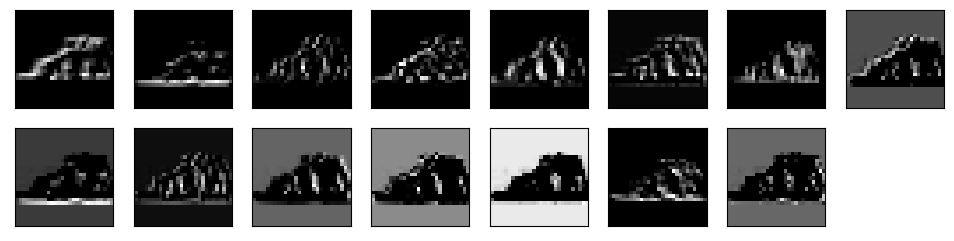

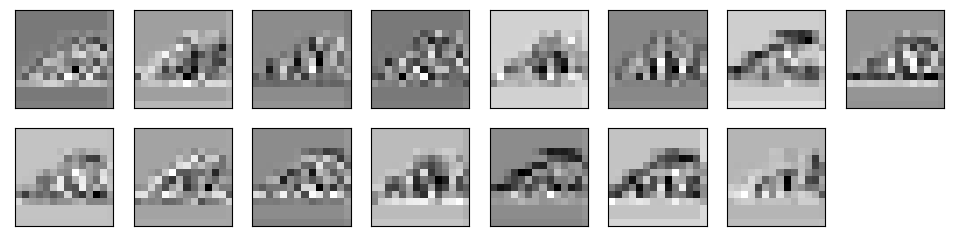

In [33]:
#How convolutions elaborate the images?
from keras.models import Model
from tensorflow.keras.utils import load_img, img_to_array

conv_layer_index = [0, 1, 2, 3]  #select only convolutional layers
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

img = X_test[11].reshape(28,28) #only one image from test set chosen


img = img_to_array(img)
img = np.expand_dims(img, axis=0)


feature_output = model_short.predict(img)


for ftr in feature_output:
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, 16):
        fig =plt.subplot(8, 8, i)
        fig.set_xticks([]) 
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')

    plt.show()